# Black or White Line on Image

Aussi appelé ligne de pixels morts ou chauds

**Pour reproduire l'effet de defect pîxels, nous allons effectuer:**

- selection d'une ligne sur l'image de base
- créer une ligne noir ou blanche
- mettre la ligne sur l'image

In [134]:
import os
import sys
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
from scipy import ndimage

In [135]:
 DATASET_PATH = os.path.join(os.getcwd(), "input") # chemin dossier contenant les images cleans # 
random.seed(42)

In [145]:
def _CreateDefect(IMG_PATH, name):
    image = Image.open(IMG_PATH)
    
    width, height = image.size
    y = random.randint(0, height)
    color = random.randint(0,1)

    img_np = np.array(image)
    
    img_np[y,:,:] = color*255
    
    Image.fromarray(img_np).save('output/'+ name + '_defectline' + '.png') # 'output/' do
    print(y)

In [146]:
for file in os.listdir(DATASET_PATH):
    if(file.__contains__('jpg')):
        name = file.split('.')[0]
        _CreateDefect(DATASET_PATH + "\\" + file, name)

225
284
163
348


In [143]:
def defectCorrection(h, IMG_PATH):
    img_defect = np.array(Image.open(IMG_PATH))
    display(Image.fromarray(img_defect))
    
    mean_convol = np.array(
            [
                [0,0,1/2,0,0],
                [0,0,0,0,0],
                [0,0,0,0,0],
                [0,0,0,0,0],
                [0,0,1/2,0,0]
            ])

    img_solve = np.zeros((img_defect.shape[0], img_defect.shape[1], img_defect.shape[2]))

    img_solve[:,:,0] = ndimage.filters.convolve(img_defect[:,:,0], mean_convol)
    img_solve[:,:,1] = ndimage.filters.convolve(img_defect[:,:,1], mean_convol)
    img_solve[:,:,2] = ndimage.filters.convolve(img_defect[:,:,2], mean_convol)

    img_finale = np.copy(img_defect)
    img_finale[h,:,:] = img_solve[h,:,:]

    display(Image.fromarray(img_finale))
    Image.fromarray(img_finale).save('output/solve.jpg')

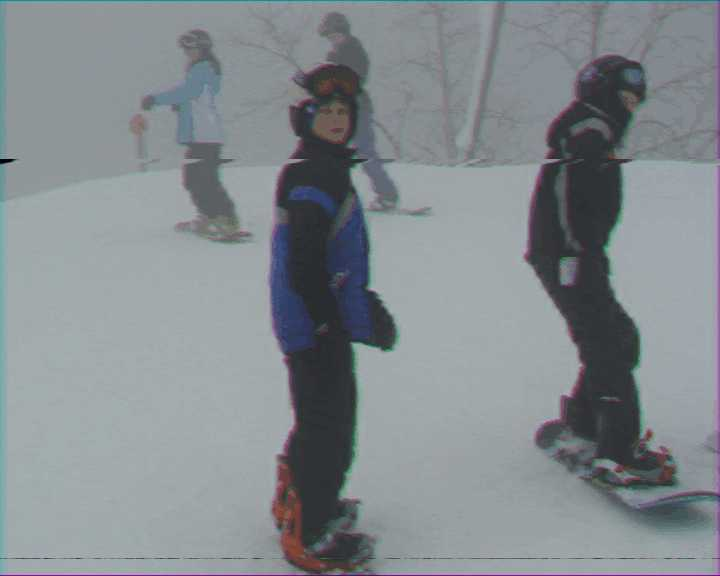

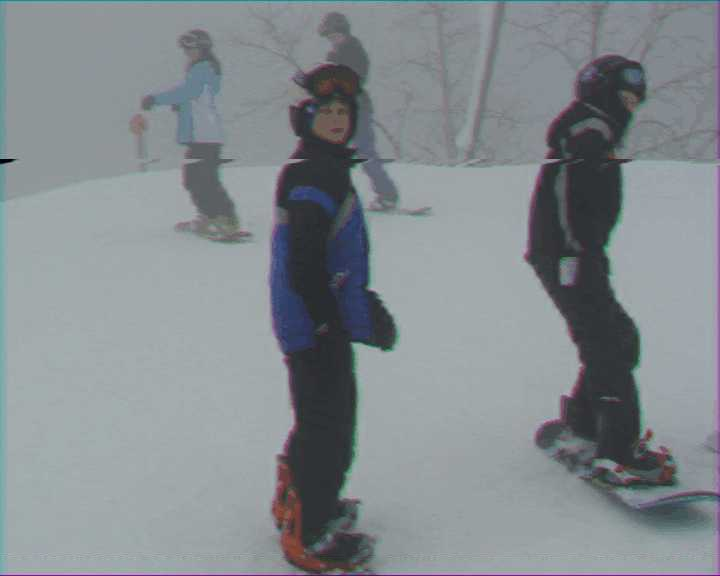

In [148]:
defectCorrection(558,'output/000000055517.jpg')